In [1]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
# pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
pd.set_option('display.max_columns', None) #输出所有列

def set_ch():
    from pylab import mpl
    #中文字体问题已经解决，记录在evernote中
    #mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
set_ch()
from datetime import datetime,timedelta
import matplotlib
matplotlib.style.use('ggplot')
import sys
import json
import urllib2
import flatten_json
import seaborn as sns
import psycopg2

/Users/shirui/anaconda2/lib/python2.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


### 音频质量好的

In [7]:
df_cutScore = pd.read_csv('data/data_final_with_ss.csv',encoding='utf-8')
df_cutScore = df_cutScore.reset_index(drop=True)
df_cutScore.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,response,ss_score,deltaj1
0,<8,Booklet 1,866479,668001,<U+9605><U+8BFB><U+586B><U+7A7A>,Reading,Grammar,http://ellis.shuobaotang.com/exercises/866479/...,5.0,95813964,1.0,NaN,NaN
1,<8,Booklet 1,866480,434270,<U+5355><U+9879><U+9009><U+62E9><U+52A0><U+957...,Grammar,Reading,http://ellis.shuobaotang.com/exercises/866480/...,1.0,95813964,0.0,NaN,0.6112


In [143]:
df_cutScore

511367

In [14]:
df_ss_cs = df_cutScore[[False if np.isnan(df_cutScore.ss_score[i]) else True for i in range(len(df_cutScore))]]
df_ss_cs.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,response,ss_score,deltaj1
502045,<8,Booklet 1,901839,738526,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901839/...,1.0,89366620,50.0,0.0,0.234
502046,<8,Booklet 1,901840,826121,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901840/...,1.0,89366620,0.0,0.0,0.182


In [17]:
df_ss_cs.columns = [u'course', u'unit', u'exercise_id', u'source_id', u'template',
       u'domain1', u'domain2', u'ellis_link', u'score_category',
       u'passport_id', u'cs_score', u'ss_score', u'deltaj1']

df_ss_cs = df_ss_cs.reset_index(drop=True)

response: CS的分数     
ss_score: singsound分数     
deltaj1: 在itembank中的题目难度

#### cs cutScore——58

In [22]:
# cs以58划分后的0-1序列
cs_cut = [0.0 if sc<58 else 1.0 for sc in df_ss_cs.cs_score.values]

df_ss_cs['cs_cut'] = cs_cut
df_ss_cs.head(2)

In [87]:
# 48_78之间可能的singsound的cut序列
ss_cut_li = []
for i in range(0,79):
    rec = [0.0 if sc<i else 1.0 for sc in df_ss_cs.ss_score.values]
    ss_cut_li.append(rec)

col_name = ['number'+str(i) for i in range(0,79)]

df_ss_cut = pd.DataFrame(ss_cut_li)
df_ss_cut = df_ss_cut.T
df_ss_cut.columns = col_name
df_ss_cut.head(2)

In [90]:
df_ss_cut['cs_cut'] = df_ss_cs.cs_cut

df_ss_cut.head(2)

In [93]:
# 计算差异
diff_li = []
idx_name = []
for num in range(0,79):
    diff = 0
    for i in range(len(df_ss_cut)):
        diff = diff + np.square(df_ss_cut.cs_cut[i] - eval('df_ss_cut.number' + str(num) + '[i]'))
    idx_name.append('number' + str(num))
    diff_li.append(diff)

In [94]:
df_diff = pd.DataFrame(diff_li)
df_diff.columns = ['diff_']
df_diff.index = idx_name

In [95]:
df_diff.head(5)

,diff_
number0,3482.0
number1,2807.0
number2,2796.0
number3,2775.0
number4,2742.0


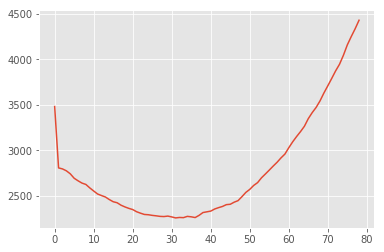

In [96]:
plt.plot(range(0, 79), df_diff.diff_)

In [99]:
df_diff[df_diff.diff_ == df_diff.diff_.min()]

,diff_
number31,2257.0


31的时候差异最小  

cs评分比ss严格，cs的cut score为58，ss的cut score应该大于58

怀疑：基于音频质量过滤过数据。接下来查看未过滤的数据

### 所有数据

In [103]:
df_cutScore_all = pd.read_csv('data/data_final_with_ss_all.csv',encoding='utf-8')
df_cutScore_all = df_cutScore_all.reset_index(drop=True)
df_cutScore_all.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,response,ss_score,deltaj1
0,<8,Booklet 1,866479,668001,<U+9605><U+8BFB><U+586B><U+7A7A>,Reading,Grammar,http://ellis.shuobaotang.com/exercises/866479/...,5.0,95813964,1.0,NaN,NaN
1,<8,Booklet 1,866480,434270,<U+5355><U+9879><U+9009><U+62E9><U+52A0><U+957...,Grammar,Reading,http://ellis.shuobaotang.com/exercises/866480/...,1.0,95813964,0.0,NaN,0.6112


In [485]:
len(df_cutScore)

511367

In [105]:
df_ss_cs_all = df_cutScore_all[[False if np.isnan(df_cutScore_all.ss_score[i]) else True for i in range(len(df_cutScore_all))]]
df_ss_cs_all.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,response,ss_score,deltaj1
502045,<8,Booklet 1,901839,738526,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901839/...,1.0,37074640,0.000000,0.0,0.234
502046,<8,Booklet 1,901840,826121,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901840/...,1.0,37074640,3.333333,0.0,0.182


In [106]:
len(df_ss_cs_all)

15436

In [107]:
df_ss_cs_all.columns = [u'course', u'unit', u'exercise_id', u'source_id', u'template',
       u'domain1', u'domain2', u'ellis_link', u'score_category',
       u'passport_id', u'cs_score', u'ss_score', u'deltaj1']

df_ss_cs_all = df_ss_cs_all.reset_index(drop=True)

In [108]:
cs_cut_all = [0.0 if sc<58 else 1.0 for sc in df_ss_cs_all.cs_score.values]

df_ss_cs_all['cs_cut'] = cs_cut_all
df_ss_cs_all.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,cs_score,ss_score,deltaj1,cs_cut
0,<8,Booklet 1,901839,738526,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901839/...,1.0,37074640,0.000000,0.0,0.234,0.0
1,<8,Booklet 1,901840,826121,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901840/...,1.0,37074640,3.333333,0.0,0.182,0.0


In [109]:
# 48_78之间可能的cut序列
ss_cut_li_all = []
for i in range(10,71):
    rec = [0.0 if sc<i else 1.0 for sc in df_ss_cs_all.ss_score.values]
    ss_cut_li_all.append(rec)

In [110]:
col_name_all = ['number'+str(i) for i in range(10,71)]

In [111]:
df_ss_cut_all = pd.DataFrame(ss_cut_li_all)
df_ss_cut_all = df_ss_cut_all.T
df_ss_cut_all.columns = col_name_all
df_ss_cut_all.head(2)

,number10,number11,number12,number13,number14,number15,number16,number17,number18,number19,number20,number21,number22,number23,number24,number25,number26,number27,number28,number29,number30,number31,number32,number33,number34,number35,number36,number37,number38,number39,number40,number41,number42,number43,number44,number45,number46,number47,number48,number49,number50,number51,number52,number53,number54,number55,number56,number57,number58,number59,number60,number61,number62,number63,number64,number65,number66,number67,number68,number69,number70
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
df_ss_cut_all['cs_cut'] = df_ss_cs_all.cs_cut

In [113]:
# 计算差异
diff_li_all = []
idx_name_all = []
for num in range(10,71):
    diff = 0
    for i in range(len(df_ss_cut_all)):
        diff = diff + np.square(df_ss_cut_all.cs_cut[i] - eval('df_ss_cut_all.number' + str(num) + '[i]'))
    idx_name_all.append('number' + str(num))
    diff_li_all.append(diff)

In [114]:
df_diff_all = pd.DataFrame(diff_li_all)
df_diff_all.columns = ['diff_']
df_diff_all.index = idx_name_all

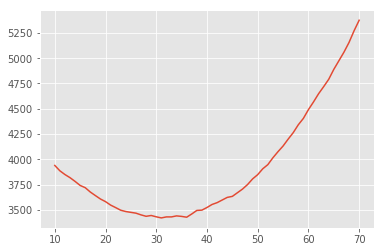

In [118]:
plt.plot(range(10, 71), df_diff_all.diff_)

In [122]:
df_diff_all[df_diff_all.diff_ == df_diff_all.diff_.min()]

,diff_
number31,3420.0


(20, 40)

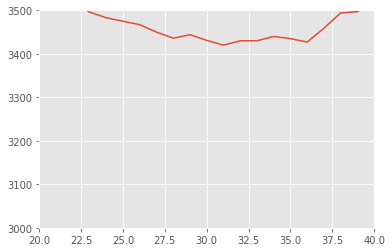

In [123]:
# 放大局部
plt.plot(range(10, 71), df_diff_all.diff_)
plt.ylim(3000, 3500)
plt.xlim(20,40)

未过滤音质，同样cut_score=31

由于各题难度不一，有必要再进行一轮TAM估计，直接看效果（难度飘逸）是否与该结果吻合

### 准备TAM数据

In [158]:
df_good_cut = pd.concat([df_ss_cs, df_ss_cut.iloc[:,20:71]], axis=1)
df_good_cut['cs_cut'] = df_ss_cut.cs_cut

In [159]:
df_good_cut.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,cs_score,ss_score,deltaj1,cs_cut,number20,number21,number22,number23,number24,number25,number26,number27,number28,number29,number30,number31,number32,number33,number34,number35,number36,number37,number38,number39,number40,number41,number42,number43,number44,number45,number46,number47,number48,number49,number50,number51,number52,number53,number54,number55,number56,number57,number58,number59,number60,number61,number62,number63,number64,number65,number66,number67,number68,number69,number70
0,<8,Booklet 1,901839,738526,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901839/...,1.0,89366620,50.0,0.0,0.234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,<8,Booklet 1,901840,826121,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901840/...,1.0,89366620,0.0,0.0,0.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
df_good_cs = pd.pivot_table(df_good_cut, index = ['passport_id'], columns=['exercise_id'], values=['cs_cut']).cs_cut

In [198]:
pd.DataFrame(df_good_cs.count()).sort_values(by=[0],ascending=False).iloc[:50].index.values

array([901873, 901879, 901860, 901861, 901862, 901880, 901881, 901884,
       901882, 901874, 901878, 901866, 901839, 901883, 901840, 901891,
       901877, 901856, 901865, 901857, 901867, 901875, 901892, 901854,
       901885, 901893, 901896, 901859, 901895, 901869, 901888, 901872,
       901894, 901887, 901886, 901890, 901868, 901871, 901870, 902093,
       902183, 901897, 901898, 901902, 901922, 901921, 901899, 902190,
       901925, 901901])

In [189]:
# df_good_cs 存放音频质量好的，50道题目的use-item表——以58作为cutScore
df_good_cs50 = df_good_cs[[901873, 901879, 901860, 901861, 901862, 901880, 901881, 901884,
       901882, 901874, 901878, 901866, 901839, 901883, 901840, 901891,
       901877, 901856, 901865, 901857, 901867, 901875, 901892, 901854,
       901885, 901893, 901896, 901859, 901895, 901869, 901888, 901872,
       901894, 901887, 901886, 901890, 901868, 901871, 901870, 902093,
       902183, 901897, 901898, 901902, 901922, 901921, 901899, 902190,
       901925, 901901]]

In [207]:
# df_good_ss 存放质量好的，50道题目的user—item表——以【20—70】作为cutScore，连接为一张宽表，每50道题目为一种cut
df_good_ss = pd.DataFrame()

for i in range(20,71):
    df_middle = eval('pd.pivot_table(df_good_cut, index = ["passport_id"], columns=["exercise_id"], values=["number' + str(i) + '"]).number' + str(i))
    df_middle = df_middle[[901873, 901879, 901860, 901861, 901862, 901880, 901881, 901884,
           901882, 901874, 901878, 901866, 901839, 901883, 901840, 901891,
           901877, 901856, 901865, 901857, 901867, 901875, 901892, 901854,
           901885, 901893, 901896, 901859, 901895, 901869, 901888, 901872,
           901894, 901887, 901886, 901890, 901868, 901871, 901870, 902093,
           902183, 901897, 901898, 901902, 901922, 901921, 901899, 902190,
           901925, 901901]]
    df_good_ss = pd.concat([df_good_ss,df_middle], axis=1)

In [303]:
# 找到需要fixed的题目

# 非语音题
dsr_idx = df_ss_cs.exercise_id.unique()
df_fixed = df_cutScore[[True if idx not in dsr_idx else False for idx in df_cutScore.exercise_id]]

In [304]:
# 过滤，留下有response也在itembank中有的题目——后期难度估计可与itembank的难度进行对比
df_fixed = df_fixed[[False if (np.isnan(df_fixed.response[i]) or np.isnan(df_fixed.deltaj1[i])) else True for i in range(len(df_fixed))]]
# 过滤，留下与df_good_cs中相同user的数据——fixed和dsr的要拼接在一起
dsr_usr_idx = df_good_cs.index.values
df_fixed = df_fixed[[True if idx in dsr_usr_idx else False for idx in df_fixed.passport_id.values]]

In [307]:
df_fixed_res = pd.pivot_table(df_fixed, index=['passport_id'], columns=['exercise_id'], values=['response']).response

In [311]:
df_fixed_res.count().iloc[:50].index.values

array([866480, 866481, 866484, 866494, 866496, 866497, 866502, 866508,
       866510, 866513, 866514, 866517, 866518, 866519, 866526, 866527,
       866528, 866529, 866530, 866531, 866534, 866537, 866541, 866542,
       866546, 866549, 866552, 866553, 866556, 866558, 866559, 866564,
       866573, 866575, 866578, 866580, 866582, 866583, 866585, 866586,
       866591, 866592, 866594, 866595, 866596, 866600, 866603, 866605,
       866606, 866607])

In [312]:
df_fixed_res = df_fixed_res[[866480, 866481, 866484, 866494, 866496, 866497, 866502, 866508,
       866510, 866513, 866514, 866517, 866518, 866519, 866526, 866527,
       866528, 866529, 866530, 866531, 866534, 866537, 866541, 866542,
       866546, 866549, 866552, 866553, 866556, 866558, 866559, 866564,
       866573, 866575, 866578, 866580, 866582, 866583, 866585, 866586,
       866591, 866592, 866594, 866595, 866596, 866600, 866603, 866605,
       866606, 866607]]

In [313]:
col_name = [866480, 866481, 866484, 866494, 866496, 866497, 866502, 866508,
       866510, 866513, 866514, 866517, 866518, 866519, 866526, 866527,
       866528, 866529, 866530, 866531, 866534, 866537, 866541, 866542,
       866546, 866549, 866552, 866553, 866556, 866558, 866559, 866564,
       866573, 866575, 866578, 866580, 866582, 866583, 866585, 866586,
       866591, 866592, 866594, 866595, 866596, 866600, 866603, 866605,
       866606, 866607]
new_col_name = [str(nm)+'_fix' for nm in col_name]
df_fixed_res.columns = new_col_name

In [326]:
df_fixed_res.head(2)

,866480_fix,866481_fix,866484_fix,866494_fix,866496_fix,866497_fix,866502_fix,866508_fix,866510_fix,866513_fix,866514_fix,866517_fix,866518_fix,866519_fix,866526_fix,866527_fix,866528_fix,866529_fix,866530_fix,866531_fix,866534_fix,866537_fix,866541_fix,866542_fix,866546_fix,866549_fix,866552_fix,866553_fix,866556_fix,866558_fix,866559_fix,866564_fix,866573_fix,866575_fix,866578_fix,866580_fix,866582_fix,866583_fix,866585_fix,866586_fix,866591_fix,866592_fix,866594_fix,866595_fix,866596_fix,866600_fix,866603_fix,866605_fix,866606_fix,866607_fix
passport_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10042447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10057994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
df_good_cs = pd.merge(df_good_cs50, df_fixed_res, left_index=True, right_index=True)
df_good_ss = pd.merge(df_good_ss, df_fixed_res, left_index=True, right_index=True)

In [359]:
df_good_ss.to_csv('data/good_ss.csv')
df_good_cs.to_csv('data/good_cs.csv')

In [330]:
df_cutScore.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,response,ss_score,deltaj1
0,<8,Booklet 1,866479,668001,<U+9605><U+8BFB><U+586B><U+7A7A>,Reading,Grammar,http://ellis.shuobaotang.com/exercises/866479/...,5.0,95813964,1.0,NaN,NaN
1,<8,Booklet 1,866480,434270,<U+5355><U+9879><U+9009><U+62E9><U+52A0><U+957...,Grammar,Reading,http://ellis.shuobaotang.com/exercises/866480/...,1.0,95813964,0.0,NaN,0.6112


In [340]:
df_fixed_diff = df_cutScore.drop_duplicates(['exercise_id','deltaj1'])

In [345]:
df_fixed_diff = df_fixed_diff[[True if idx in col_name else False for idx in df_fixed_diff.exercise_id.values]][['exercise_id','deltaj1']].reset_index(drop=True)

In [347]:
df_fixed_diff['exercise_id'] = new_col_name

In [350]:
df_fixed_diff.to_csv('data/fix_diff.csv')

In [365]:
test = ['number' + str(i) for i in range(20,71)]

In [367]:
np.array(test)

array(['number20', 'number21', 'number22', 'number23', 'number24',
       'number25', 'number26', 'number27', 'number28', 'number29',
       'number30', 'number31', 'number32', 'number33', 'number34',
       'number35', 'number36', 'number37', 'number38', 'number39',
       'number40', 'number41', 'number42', 'number43', 'number44',
       'number45', 'number46', 'number47', 'number48', 'number49',
       'number50', 'number51', 'number52', 'number53', 'number54',
       'number55', 'number56', 'number57', 'number58', 'number59',
       'number60', 'number61', 'number62', 'number63', 'number64',
       'number65', 'number66', 'number67', 'number68', 'number69',
       'number70'], dtype='|S8')

##### 所有数据，未过滤音质

In [414]:
[len(df_ss_cs_all),len(df_ss_cut_all)]

[15436, 15436]

In [421]:
df_ss_cut_all.iloc[:,10:-1].head(2)

,number20,number21,number22,number23,number24,number25,number26,number27,number28,number29,number30,number31,number32,number33,number34,number35,number36,number37,number38,number39,number40,number41,number42,number43,number44,number45,number46,number47,number48,number49,number50,number51,number52,number53,number54,number55,number56,number57,number58,number59,number60,number61,number62,number63,number64,number65,number66,number67,number68,number69,number70
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [423]:
df_all_cut = pd.concat([df_ss_cs_all, df_ss_cut_all.iloc[:,10:-1]], axis=1)
df_all_cut.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,cs_score,ss_score,deltaj1,cs_cut,number20,number21,number22,number23,number24,number25,number26,number27,number28,number29,number30,number31,number32,number33,number34,number35,number36,number37,number38,number39,number40,number41,number42,number43,number44,number45,number46,number47,number48,number49,number50,number51,number52,number53,number54,number55,number56,number57,number58,number59,number60,number61,number62,number63,number64,number65,number66,number67,number68,number69,number70
0,<8,Booklet 1,901839,738526,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901839/...,1.0,37074640,0.000000,0.0,0.234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,<8,Booklet 1,901840,826121,Free Talk 2,Speaking & Listening,Reading,http://ellis.shuobaotang.com/exercises/901840/...,1.0,37074640,3.333333,0.0,0.182,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [424]:
df_all_cs = pd.pivot_table(df_all_cut, index = ['passport_id'], columns=['exercise_id'], values=['cs_cut']).cs_cut

In [425]:
pd.DataFrame(df_all_cs.count()).sort_values(by=[0],ascending=False).iloc[:50].index.values

array([901873, 901860, 901879, 901880, 901874, 901881, 901882, 901875,
       901877, 901883, 901861, 901862, 901878, 901865, 901884, 901866,
       901839, 901856, 901854, 901840, 901859, 901857, 901891, 901892,
       901885, 901893, 901894, 901895, 901867, 901886, 901887, 901888,
       901896, 901868, 901869, 901870, 901871, 901890, 901872, 902093,
       902183, 901897, 901898, 901902, 901901, 902189, 901921, 901899,
       901924, 901923])

In [426]:
# df_all_cs 存放所有音频来自cs评分的作答矩阵，50道题目的use-item表——以58作为cutScore
df_all_cs50 = df_all_cs[[901873, 901860, 901879, 901880, 901874, 901881, 901882, 901875,
                        901877, 901883, 901861, 901862, 901878, 901865, 901884, 901866,
                        901839, 901856, 901854, 901840, 901859, 901857, 901891, 901892,
                        901885, 901893, 901894, 901895, 901867, 901886, 901887, 901888,
                        901896, 901868, 901869, 901870, 901871, 901890, 901872, 902093,
                        902183, 901897, 901898, 901902, 901901, 902189, 901921, 901899,
                        901924, 901923]]

In [427]:
# df_all_ss 存放所有音频的来自ss评分的作答矩阵，50道题目的user—item表——以【20—70】作为cutScore，连接为一张宽表，每50道题目为一种cut
df_all_ss = pd.DataFrame()

for i in range(20,71):
    df_middle = eval('pd.pivot_table(df_all_cut, index = ["passport_id"], columns=["exercise_id"], values=["number' + str(i) + '"]).number' + str(i))
    df_middle = df_middle[[901873, 901860, 901879, 901880, 901874, 901881, 901882, 901875,
                        901877, 901883, 901861, 901862, 901878, 901865, 901884, 901866,
                        901839, 901856, 901854, 901840, 901859, 901857, 901891, 901892,
                        901885, 901893, 901894, 901895, 901867, 901886, 901887, 901888,
                        901896, 901868, 901869, 901870, 901871, 901890, 901872, 902093,
                        902183, 901897, 901898, 901902, 901901, 902189, 901921, 901899,
                        901924, 901923]]
    df_all_ss = pd.concat([df_all_ss,df_middle], axis=1)

In [428]:
df_all_ss.shape

(3616, 2550)

In [429]:
# 找到需要fixed的题目

# 非语音题
dsr_idx = df_ss_cs_all.exercise_id.unique()
df_fixed = df_cutScore_all[[True if idx not in dsr_idx else False for idx in df_cutScore_all.exercise_id]]

In [431]:
df_fixed.head(2)

,course,unit,exercise_id,source_id,template,domain1,domain2,ellis_link,score_category,passport_id,response,ss_score,deltaj1
0,<8,Booklet 1,866479,668001,<U+9605><U+8BFB><U+586B><U+7A7A>,Reading,Grammar,http://ellis.shuobaotang.com/exercises/866479/...,5.0,95813964,1.0,NaN,NaN
1,<8,Booklet 1,866480,434270,<U+5355><U+9879><U+9009><U+62E9><U+52A0><U+957...,Grammar,Reading,http://ellis.shuobaotang.com/exercises/866480/...,1.0,95813964,0.0,NaN,0.6112


In [432]:
# 过滤，留下有response同时在itembank中有难度题目——后期难度估计可与itembank的难度进行对比
df_fixed = df_fixed[[False if (np.isnan(df_fixed.response[i]) or np.isnan(df_fixed.deltaj1[i])) else True for i in range(len(df_fixed))]]

In [435]:
# 过滤，留下与df_all_cs中相同user的数据——fixed和dsr的要拼接在一起
dsr_usr_idx = df_all_cs.index.values
df_fixed = df_fixed[[True if idx in dsr_usr_idx else False for idx in df_fixed.passport_id.values]]

In [437]:
df_fixed_res = pd.pivot_table(df_fixed, index=['passport_id'], columns=['exercise_id'], values=['response']).response

In [438]:
df_fixed_res.count().iloc[:50].index.values

array([866480, 866481, 866484, 866494, 866496, 866497, 866502, 866508,
       866510, 866513, 866514, 866517, 866518, 866519, 866526, 866527,
       866528, 866529, 866530, 866531, 866534, 866537, 866541, 866542,
       866546, 866549, 866552, 866553, 866556, 866558, 866559, 866564,
       866573, 866575, 866578, 866580, 866582, 866583, 866585, 866586,
       866591, 866592, 866594, 866595, 866596, 866600, 866603, 866605,
       866606, 866607])

In [440]:
df_fixed_res = df_fixed_res[[866480, 866481, 866484, 866494, 866496, 866497, 866502, 866508,
       866510, 866513, 866514, 866517, 866518, 866519, 866526, 866527,
       866528, 866529, 866530, 866531, 866534, 866537, 866541, 866542,
       866546, 866549, 866552, 866553, 866556, 866558, 866559, 866564,
       866573, 866575, 866578, 866580, 866582, 866583, 866585, 866586,
       866591, 866592, 866594, 866595, 866596, 866600, 866603, 866605,
       866606, 866607]]

In [441]:
col_name = [866480, 866481, 866484, 866494, 866496, 866497, 866502, 866508,
       866510, 866513, 866514, 866517, 866518, 866519, 866526, 866527,
       866528, 866529, 866530, 866531, 866534, 866537, 866541, 866542,
       866546, 866549, 866552, 866553, 866556, 866558, 866559, 866564,
       866573, 866575, 866578, 866580, 866582, 866583, 866585, 866586,
       866591, 866592, 866594, 866595, 866596, 866600, 866603, 866605,
       866606, 866607]
new_col_name = [str(nm)+'_fix' for nm in col_name]
df_fixed_res.columns = new_col_name

In [442]:
df_all_cs = pd.merge(df_all_cs50, df_fixed_res, left_index=True, right_index=True)
df_all_ss = pd.merge(df_all_ss, df_fixed_res, left_index=True, right_index=True)

In [443]:
df_all_ss.to_csv('data/all_ss.csv')
df_all_cs.to_csv('data/all_cs.csv')

In [444]:
df_fixed_diff = df_cutScore_all.drop_duplicates(['exercise_id','deltaj1'])

df_fixed_diff = df_fixed_diff[[True if idx in col_name else False for idx in df_fixed_diff.exercise_id.values]][['exercise_id','deltaj1']].reset_index(drop=True)

df_fixed_diff['exercise_id'] = new_col_name
df_fixed_diff.to_csv('data/all_fix_diff.csv')

### 查看Tam结果

In [374]:
df_tam = pd.read_csv('data/good_diff.csv',sep=' ')
df_tam.columns = ['index', 'diff_']

In [376]:
np.array(df_tam.diff_.values)

array([-1.1542, -1.0794, -0.8165, ..., -1.6633, -1.3737, -0.1891])

In [387]:
df_tam_diff = pd.DataFrame(np.reshape(np.array(df_tam.diff_), (52,50))).T
df_tam_diff.columns = ['number20', 'number21', 'number22', 'number23', 'number24',
       'number25', 'number26', 'number27', 'number28', 'number29',
       'number30', 'number31', 'number32', 'number33', 'number34',
       'number35', 'number36', 'number37', 'number38', 'number39',
       'number40', 'number41', 'number42', 'number43', 'number44',
       'number45', 'number46', 'number47', 'number48', 'number49',
       'number50', 'number51', 'number52', 'number53', 'number54',
       'number55', 'number56', 'number57', 'number58', 'number59',
       'number60', 'number61', 'number62', 'number63', 'number64',
       'number65', 'number66', 'number67', 'number68', 'number69',
       'number70', 'cs_diff']

In [477]:
df_tam_diff.index = [901873, 901879, 901860, 901861, 901862, 901880, 901881, 901884,
           901882, 901874, 901878, 901866, 901839, 901883, 901840, 901891,
           901877, 901856, 901865, 901857, 901867, 901875, 901892, 901854,
           901885, 901893, 901896, 901859, 901895, 901869, 901888, 901872,
           901894, 901887, 901886, 901890, 901868, 901871, 901870, 902093,
           902183, 901897, 901898, 901902, 901922, 901921, 901899, 902190,
           901925, 901901]

In [472]:
df_tam_diff['vari'] = np.abs(df_tam_diff.cs_diff - df_tam_diff.number38)

In [478]:
df_tam_diff[['number38','cs_diff','vari']].sort_values(by=['vari'],ascending=False)

,number38,cs_diff,vari
901894,-1.440330,1.214104,2.654434
901870,-1.386505,0.372228,1.758734
901886,-1.205944,0.394807,1.600750
901868,-1.600965,-0.147063,1.453902
901892,-1.022333,0.414729,1.437062
901874,-1.280616,0.144564,1.425180
901893,0.154284,-1.027741,1.182024
901901,0.969276,-0.189100,1.158375
901869,0.005466,-1.141889,1.147354
901880,-0.814377,0.283666,1.098043


In [403]:
tam_diff_li = []
for num in range(len(df_tam_diff.columns)):
    tam_diff = 0
    for i in range(50):
        tam_diff = tam_diff + np.square(df_tam_diff.iloc[:,-1].values[i] - df_tam_diff.iloc[:,num].values[i])
    tam_diff_li.append(tam_diff)

In [405]:
len(tam_diff_li)

52

In [408]:
df_good_diff = pd.DataFrame()
df_good_diff['diff_'] = tam_diff_li
df_good_diff['num'] = df_tam_diff.columns.values

In [409]:
df_good_diff

,diff_,num
0,79.254165,number20
1,73.570082,number21
2,69.721672,number22
3,66.380011,number23
4,58.698200,number24
5,56.316537,number25
6,53.449766,number26
7,50.261515,number27
8,47.330544,number28
9,44.982489,number29


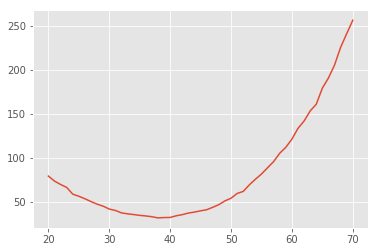

In [412]:
plt.plot(range(20, 71), df_good_diff.diff_[:-1])

#### 所有

In [450]:
df_tam_all = pd.read_csv('data/all_diff.csv',sep=' ')
df_tam_all.columns = ['index', 'diff_']

In [451]:
df_tam_all.head(2)

,index,diff_
1,1,-0.553342
2,2,-0.231011


In [452]:
df_tam_diff_all = pd.DataFrame(np.reshape(np.array(df_tam_all.diff_), (52,50))).T
df_tam_diff_all.columns = ['number20', 'number21', 'number22', 'number23', 'number24',
       'number25', 'number26', 'number27', 'number28', 'number29',
       'number30', 'number31', 'number32', 'number33', 'number34',
       'number35', 'number36', 'number37', 'number38', 'number39',
       'number40', 'number41', 'number42', 'number43', 'number44',
       'number45', 'number46', 'number47', 'number48', 'number49',
       'number50', 'number51', 'number52', 'number53', 'number54',
       'number55', 'number56', 'number57', 'number58', 'number59',
       'number60', 'number61', 'number62', 'number63', 'number64',
       'number65', 'number66', 'number67', 'number68', 'number69',
       'number70', 'cs_diff']

In [454]:
tam_diff_li_all = []
for num in range(len(df_tam_diff_all.columns)):
    tam_diff = 0
    for i in range(50):
        tam_diff = tam_diff + np.square(df_tam_diff_all.iloc[:,-1].values[i] - df_tam_diff_all.iloc[:,num].values[i])
    tam_diff_li_all.append(tam_diff)

In [459]:
df_tam_diff_all.head(2)

,number20,number21,number22,number23,number24,number25,number26,number27,number28,number29,number30,number31,number32,number33,number34,number35,number36,number37,number38,number39,number40,number41,number42,number43,number44,number45,number46,number47,number48,number49,number50,number51,number52,number53,number54,number55,number56,number57,number58,number59,number60,number61,number62,number63,number64,number65,number66,number67,number68,number69,number70,cs_diff
0,-0.553342,-0.472172,-0.409432,-0.377706,-0.342335,-0.294947,-0.244841,-0.217622,-0.157619,-0.127393,-0.080228,-0.047111,-0.032551,-0.000584,0.046548,0.111420,0.170949,0.201201,0.249043,0.328838,0.374476,0.422038,0.470330,0.517995,0.536487,0.572399,0.636074,0.699872,0.748652,0.809584,0.841407,0.886174,0.901655,0.930048,1.008445,1.074708,1.153560,1.169380,1.183180,1.260952,1.326673,1.427951,1.442289,1.469232,1.522169,1.566345,1.600760,1.696447,1.784010,1.833419,1.948492,0.427429
1,-0.231011,-0.177824,-0.124688,-0.127623,-0.077279,-0.010449,0.022579,0.073560,0.107961,0.123868,0.140362,0.174916,0.226563,0.244259,0.259833,0.277105,0.381250,0.432511,0.497122,0.551881,0.553964,0.621602,0.638947,0.637026,0.690473,0.706244,0.775319,0.808551,0.862288,0.892612,0.962946,0.990838,1.006346,1.003257,1.038331,1.123060,1.170313,1.187326,1.238412,1.253378,1.284878,1.336960,1.368425,1.439549,1.472735,1.566507,1.620582,1.622815,1.735188,1.807462,1.878448,0.226004


In [475]:
df_tam_diff_all.index = [901873, 901860, 901879, 901880, 901874, 901881, 901882, 901875,
                        901877, 901883, 901861, 901862, 901878, 901865, 901884, 901866,
                        901839, 901856, 901854, 901840, 901859, 901857, 901891, 901892,
                        901885, 901893, 901894, 901895, 901867, 901886, 901887, 901888,
                        901896, 901868, 901869, 901870, 901871, 901890, 901872, 902093,
                        902183, 901897, 901898, 901902, 901901, 902189, 901921, 901899,
                        901924, 901923]

In [468]:
df_tam_diff_all['vari'] = np.abs(df_tam_diff_all.cs_diff - df_tam_diff_all.number32)

In [476]:
df_tam_diff_all[['number32','cs_diff','vari']].sort_values(by=['vari'],ascending=False)

,number32,cs_diff,vari
901894,-0.653913,1.347077,2.000990
901870,-1.040023,0.383783,1.423806
901874,-0.811978,0.370149,1.182127
901886,-0.582906,0.556221,1.139127
901892,-0.415625,0.662662,1.078287
901868,-1.034033,-0.001829,1.032204
901884,0.254000,-0.738072,0.992072
901893,0.419076,-0.523491,0.942567
901872,0.086652,-0.821048,0.907701
901887,-0.412562,-1.219457,0.806895


In [456]:
df_all_diff = pd.DataFrame()
df_all_diff['diff_'] = tam_diff_li_all
df_all_diff['num'] = df_tam_diff_all.columns.values

In [457]:
df_all_diff

,diff_,num
0,33.014789,number20
1,30.809607,number21
2,28.744815,number22
3,27.032955,number23
4,26.004246,number24
5,24.941267,number25
6,23.871347,number26
7,22.602639,number27
8,21.965345,number28
9,21.134034,number29


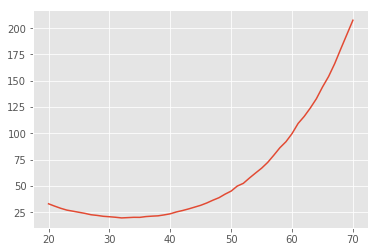

In [458]:
plt.plot(range(20, 71), df_all_diff.diff_[:-1])

In [ ]:
pd.merge(left)

In [482]:
df_cmp = pd.merge(df_tam_diff[['number38','cs_diff','vari']].sort_values(by=['vari'],ascending=False),
         df_tam_diff_all[['number32','cs_diff','vari']].sort_values(by=['vari'],ascending=False), 
         left_index=True, right_index=True, how='outer', suffixes=('_good', '_all'))

In [484]:
df_cmp.sort_values(by=['vari_good', 'vari_all'],ascending=False)

,number38,cs_diff_good,vari_good,number32,cs_diff_all,vari_all
901894,-1.440330,1.214104,2.654434,-0.653913,1.347077,2.000990
901870,-1.386505,0.372228,1.758734,-1.040023,0.383783,1.423806
901886,-1.205944,0.394807,1.600750,-0.582906,0.556221,1.139127
901868,-1.600965,-0.147063,1.453902,-1.034033,-0.001829,1.032204
901892,-1.022333,0.414729,1.437062,-0.415625,0.662662,1.078287
901874,-1.280616,0.144564,1.425180,-0.811978,0.370149,1.182127
901893,0.154284,-1.027741,1.182024,0.419076,-0.523491,0.942567
901901,0.969276,-0.189100,1.158375,0.522908,0.612816,0.089908
901869,0.005466,-1.141889,1.147354,-0.186115,-0.942227,0.756113
901880,-0.814377,0.283666,1.098043,-0.489539,0.170237,0.659776
